# Atividade 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Cursos/Fatec /3°Semestre/EstatisticaAplicada/Dados/heart.csv', sep=',', encoding='UTF-8')

Qual a quantidade total de registros?

In [ ]:
# Quantidade total de registros: 918 linhas e 12 colunas
dados.shape

(918, 12)

In [ ]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

2)	Determine a média, a moda, a mediana, o desvio padrão e a variância da variável idade.

In [ ]:
#Media de idade
round(dados.Age.mean(),2)

53.51

In [ ]:
#moda de idade
dados.Age.mode()

0    54
Name: Age, dtype: int64

In [ ]:
# mediana de idade
dados.Age.median()

54.0

In [ ]:
# desvio padrao de idade
dados.Age.std()

9.43261650673201

In [ ]:
# variancia de idade
dados.Age.var()

88.9742541630732

3)	Construa um histograma para a variável idade

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
idade = dados['Age']
idade

In [ ]:
# freq absoluta
freq_abs = Counter(idade)
freq_abs

In [ ]:
# transformar em dataFrame
tabela = pd.DataFrame.from_dict(freq_abs, orient='index')
tabela

In [ ]:
#ordenar em crescente
tabela = tabela.sort_index(ascending=True)
tabela

In [ ]:
# indíces reais
tabela.reset_index(inplace=True)
#renomear colunas
tabela = tabela.rename(columns = {'index': 'idade'})
tabela = tabela.rename(columns = {0: 'freq_abs'})
tabela

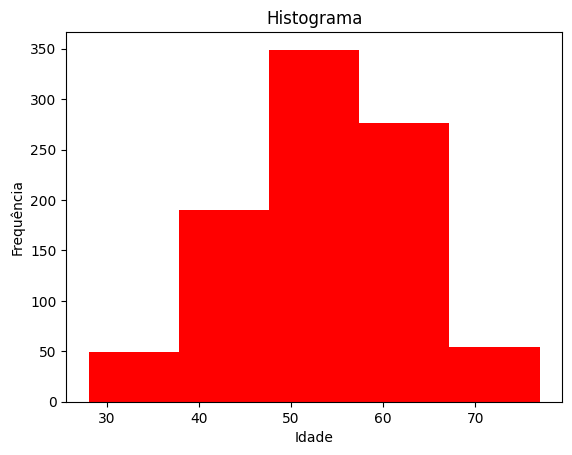

In [ ]:
from matplotlib import colors
plt.hist(dados.Age, bins = 5, color='red')
plt.title('Histograma')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

4)	Para a variável idade, a média é uma medida que representa a centralidade dos dados? Justifique a resposta.

In [ ]:
#Resposta: Sim, já que o desvio padrão de idade é apenas 9,43
idade.mean()

53.510893246187365

In [ ]:
idade.std()

9.43261650673201

5)	Determine a quantidade de pessoas do sexo feminino e do sexo masculino em porcentagem.

In [ ]:
m = dados.loc[dados.Sex.isin(['M'])]
f = dados.loc[dados.Sex.isin(['F'])]

In [ ]:
total = len(m) + len(f)
totalM = (len(m) / total) * 100
totalF = (len(f) / total) * 100
total

918

In [ ]:
# Quantiade de masculinos em %
round(totalM,2)

78.98

In [ ]:
# Quantidade de femininos em %
round(totalF,2)

21.02

6)	Determine os valores máximo, mínimo e os quartis para a variável colesterol.

In [ ]:
# minimo
dados['Cholesterol'].min()

0

In [ ]:
# Maximo
dados.Cholesterol.max()

603

In [ ]:
#Primeiro Quartil
dados.Cholesterol.quantile(q=0.25)

173.25

In [ ]:
#Segundo quartil
dados.Cholesterol.quantile(q=0.5)

223.0

In [ ]:
# Terceiro quartil
dados.Cholesterol.quantile(q=0.75)

267.0

In [ ]:
# Percentil 90
dados.Cholesterol.quantile(q=0.90)

305.0

7)	A variável colesterol possui outliers? Se sim, estes valores outliers são coerentes com a realidade? Qual a sua sugestão para lidar com estes outliers (manter, excluir, alterar...)? Justifique a resposta

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.box(dados, y="Cholesterol")
grafico.show()

In [ ]:
# Sim, possui outliers, esses valores vao alem do valor da média e do terceiro quartil, não sendo coerentes com a realidade
# minha suguestão seria retirar esses valores, para garantir que todos os calculos e a leitura dos dados esteja coerente e não seja enviesada por eles

8)	Qual a probabilidade de sortear ao acaso uma pessoa do sexo feminino dado que ela possui idade inferior a 35 anos?

In [ ]:
def probab(A,E,B):
  resultadoA = (A / E)*100
  resultadoB = resultadoA / B
  print('{:.2f}'.format(resultadoB))

In [ ]:
# idade inferior já aconteceu
# transformar em dataFrame
idade35 = dados.loc[dados.Age < 35]
B = len(idade35)
fem = dados.loc[dados.Sex.isin(['M'])]
t = dados.Sex
E = len(t)
A = len(fem)
probab(m,E,B)
# Resposta: 3,76%

3.76
